In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [52]:
Train_data = pd.read_csv("DUMD_train.csv")
Test_data = pd.read_csv("DUMD_test.csv")

In [53]:
Train_data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2


In [54]:
X_train = Train_data.drop(columns=['UNS'])
y_train = Train_data["UNS"]
X_test = Test_data.drop(columns=['UNS'])
y_test = Test_data["UNS"]

In [55]:
y_test.head()

0    2
1    2
2    2
3    0
4    3
Name: UNS, dtype: int64

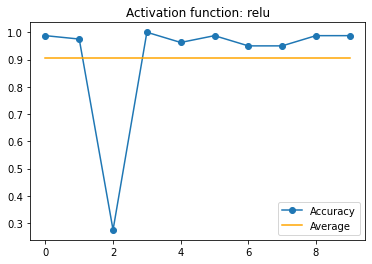

relu accuracy equals 0.9062500000000002


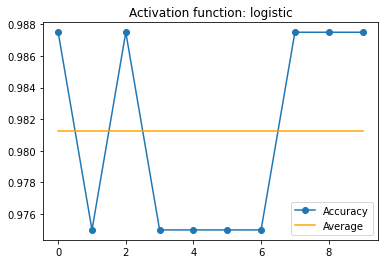

logistic accuracy equals 0.98125


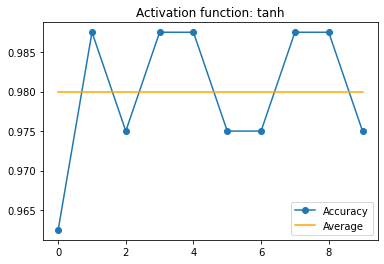

tanh accuracy equals 0.9799999999999999


In [56]:
act_fun = ["relu","logistic","tanh"]
for fun in act_fun:
    accuracy = []
    x_axis = []
    average = []
    for i in range(0,10):
        clf = MLPClassifier(random_state=i, max_iter=1000, activation =fun ,hidden_layer_sizes = (4,), learning_rate_init=0.1).fit(X_train, y_train)
        clf.predict(X_test)
        score = clf.score(X_test, y_test)
        accuracy.append(score)
        x_axis.append(i)
    fig, ax = plt.subplots()
    average_acc = sum(accuracy)/len(accuracy)
    average = [average_acc] * 10
    ax.plot(x_axis, accuracy, 'o-', label='Accuracy')
    ax.plot(x_axis ,average,color='orange',  label="Average")
    plt.title('Activation function: {}'.format(fun))
    plt.legend()
    plt.show()
    print('{} accuracy equals'.format(fun), average_acc)


### After calculating the average accuracies for for three difference activation functions we found out the champion one is logistic with average accuracy 0.0.98125

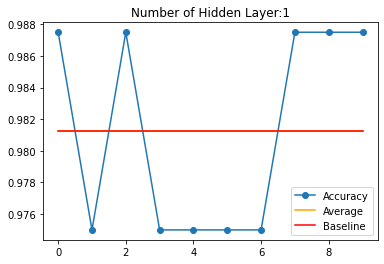

accuracy equals 0.98125


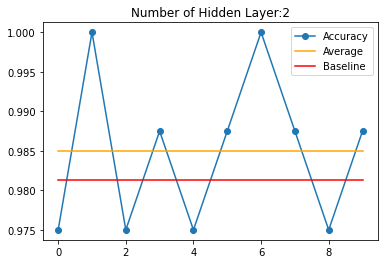

accuracy equals 0.985


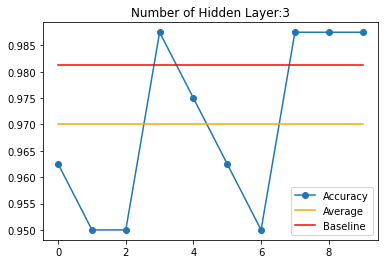

accuracy equals 0.9700000000000001


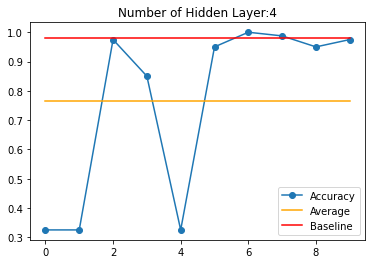

accuracy equals 0.76625


In [57]:
baseline = [0.98125] *10
for i in range(0,4):
    hidden_layers = [(4,),(6,4),(6,6,4),(6,6,6,4)]
    accuracy_2nd = []
    x_axis = []
    average_updated = []
    for j in range(0,10):
        clf = MLPClassifier(random_state=j, max_iter=1000, activation ="logistic" ,hidden_layer_sizes = hidden_layers[i], learning_rate_init=0.1).fit(X_train, y_train)
        clf.predict(X_test)
        score = clf.score(X_test, y_test)
        accuracy_2nd.append(score)
        x_axis.append(j)
    fig, ax = plt.subplots()
    average_acc_upt = sum(accuracy_2nd)/len(accuracy_2nd)
    average_upt = [average_acc_upt] * 10
    ax.plot(x_axis, accuracy_2nd, 'o-', label='Accuracy')
    ax.plot(x_axis ,average_upt,color='orange',  label="Average")
    ax.plot(x_axis ,baseline,color='red',  label="Baseline")

    plt.title('Number of Hidden Layer:{}'.format(str(i+1)))
    plt.legend()
    plt.show()
    print('accuracy equals', average_acc_upt)


### After calculating the average accuracies for for three difference activation functions we found out the champion one is model with 2 hidden layers with average accuracy eqauls to 0.985

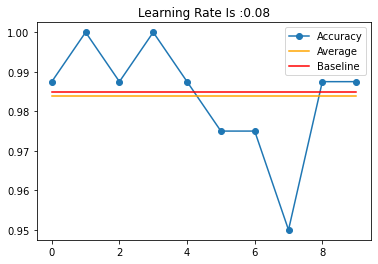

accuracy equals 0.98375


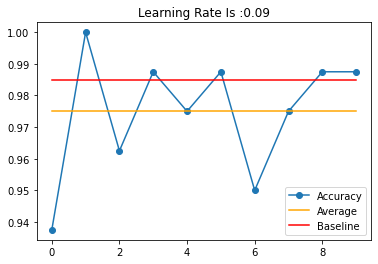

accuracy equals 0.975


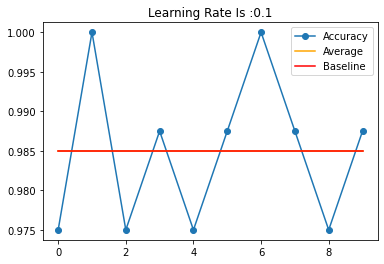

accuracy equals 0.985


In [58]:
new_baseline = [0.985] *10
learning_rate = [0.08,0.09,0.1]
for lr in learning_rate:
    accuracy_final = []
    x_axis = []
    average_final = []
    for i in range(0,10):
        clf = MLPClassifier(random_state=i, max_iter=1000, activation ="logistic" ,hidden_layer_sizes = (6,4), learning_rate_init=lr).fit(X_train, y_train)
        clf.predict(X_test)
        score = clf.score(X_test, y_test)
        accuracy_final.append(score)
        x_axis.append(i)
    fig, ax = plt.subplots()
    average_acc_final = sum(accuracy_final)/len(accuracy_final)
    average_final = [average_acc_final] * 10
    ax.plot(x_axis, accuracy_final, 'o-', label='Accuracy')
    ax.plot(x_axis ,average_final,color='orange',  label="Average")
    ax.plot(x_axis ,new_baseline,color='red',  label="Baseline")

    plt.title('Learning Rate Is :{}'.format(str(lr)))
    plt.legend()
    plt.show()
    print('accuracy equals', average_acc_final)


### After calculating the average accuracies for for three difference activation functions we found out the champion one is model with learning rate equals to 0.1 with average accuracy eqauls to 0.985, then our final parameters   [ activaiton function = logistic, learning rate = 0.1, hidden layers = 2 ]

<Figure size 1440x2160 with 0 Axes>

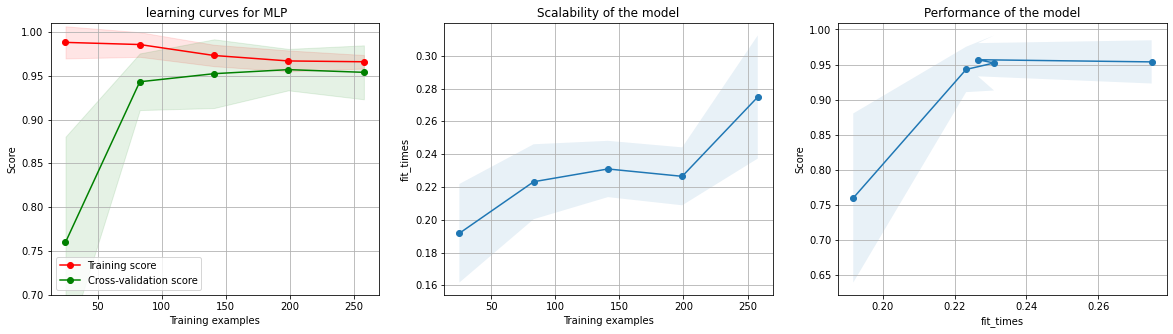

In [62]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(0, 1, figsize=(20, 30))

clf_final = MLPClassifier(random_state=10, max_iter=1000, activation ="logistic" ,hidden_layer_sizes = 2, learning_rate_init=0.1).fit(X_train, y_train)
clf_final.predict(X_test)
score = clf_final.score(X_test, y_test)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title= " learning curves for MLP"
plot_learning_curve(clf_final, title, X_train, y_train, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
y_test_list = y_test.values.tolist()
print(score)
confusion_matrix(y_test_list, clf_final.predict(X_test))

0.9875


array([[11,  0,  0,  0],
       [ 0, 25,  1,  0],
       [ 0,  0, 22,  0],
       [ 0,  0,  0, 21]], dtype=int64)

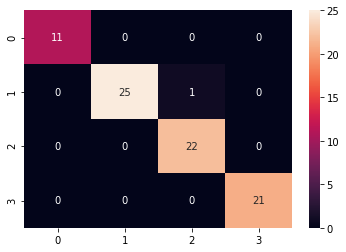

In [64]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test_list, clf_final.predict(X_test)), annot=True)